<a href="https://colab.research.google.com/github/preritt/Embed/blob/master/(2)UseIt98p46_acc_from_98p4_EpochBasedMNISTFullDataset04212019_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import packages

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", reshape=False)
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.

Image Shape: (28, 28, 1)

Training Set

In [0]:
X_validation.shape

(5000, 28, 28, 1)

In [0]:
yy = X_train.reshape(X_train.shape[0],-1)
yy.shape
# yy = np.reshape(X_train. newshape=(X_train.shape[0],-1))

(55000, 784)

In [0]:
train_data = X_train.reshape(X_train.shape[0],-1)
train_label = y_train
validation_data = X_validation.reshape(X_validation.shape[0],-1)
validation_label = y_validation
test_data = X_test.reshape(X_test.shape[0],-1)
test_label = y_test

(array([5444., 6179., 5470., 5638., 5307., 4987., 5417., 5715., 5389.,
        5454.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

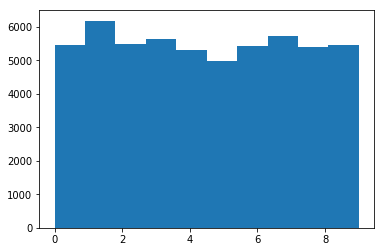

In [0]:
plt.hist(train_label)

In [0]:
# np.max(train_data[1,:])

In [0]:
# Visualize data
train_data_pandas = pd.DataFrame(train_data)
train_data_labels = pd.DataFrame(train_label)
train_data_pandas.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
train_data_labels.head()

,0
0,7
1,3
2,4
3,6
4,1


In [0]:
test_data.shape

(10000, 784)

In [0]:
validation_data.shape

(5000, 784)

#### Combine Validation and train data for MLP classifier - and set validation fraction to 4500/15000 = 0.3

In [0]:
train_valid_combined = np.concatenate((train_data, validation_data))
train_valid_combined.shape

(60000, 784)

In [0]:
train_valid_label = np.concatenate((train_label, validation_label))


#### Fit MLP Classifier

In [0]:
# clf = MLPClassifier(hidden_layer_sizes=(104),validation_fraction=0.3)
# clf.fit(train_data, train_label)

In [0]:
20*90/36

50.0

In [0]:
# clf =MLPClassifier(hidden_layer_sizes=(300,100, ), max_iter=200, alpha=1e-4,
#                     solver='adam', verbose=10, tol=1e-5, random_state=1,
#                     learning_rate_init=.1)
### acc is 98.41
clf = MLPClassifier(hidden_layer_sizes=(300,100,), max_iter=200, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
# Test set score: 0.950119

# clf.fit(train_valid_combined, train_valid_label)
clf.fit(train_data, train_label)

Iteration 1, loss = 0.27088284
Iteration 2, loss = 0.09284897
Iteration 3, loss = 0.06362837
Iteration 4, loss = 0.04513577
Iteration 5, loss = 0.03265040
Iteration 6, loss = 0.02556718
Iteration 7, loss = 0.01983507
Iteration 8, loss = 0.01265771
Iteration 9, loss = 0.00954815
Iteration 10, loss = 0.00746641
Iteration 11, loss = 0.00487287
Iteration 12, loss = 0.00280570
Iteration 13, loss = 0.00162220
Iteration 14, loss = 0.00092841
Iteration 15, loss = 0.00073810
Iteration 16, loss = 0.00063660
Iteration 17, loss = 0.00065059
Iteration 18, loss = 0.00056893
Iteration 19, loss = 0.00052885
Iteration 20, loss = 0.00050482
Iteration 21, loss = 0.00049094
Iteration 22, loss = 0.00047780
Iteration 23, loss = 0.00046712
Iteration 24, loss = 0.00045812
Iteration 25, loss = 0.00044891
Iteration 26, loss = 0.00044162
Iteration 27, loss = 0.00043538
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300, 100), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=10, warm_start=False)

#### Train Accuracy

In [0]:
clf.score(train_data,train_label)

1.0

#### Validation Accuracy

In [0]:
clf.score(validation_data,validation_label)

0.9864

#### Test accuracy

In [0]:
clf.score(test_data,test_label)

0.984

#### Tensorflow model using weights initialized from numpy model

In [0]:
enc = OneHotEncoder(handle_unknown='ignore',sparse=False)
enc.fit(train_label.reshape(1,-1).T)
train_label_one_hot = enc.transform(train_label.reshape(-1,1))
test_label_one_hot = enc.transform(test_label.reshape(-1,1))
validation_label_one_hot = enc.transform(validation_label.reshape(-1,1))
validation_test_label_one_hot = enc.transform(train_valid_label.reshape(-1,1))

In [0]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]
    
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [0]:
# hid_neuron = [90]

In [0]:
test_label_one_hot.shape

(10000, 10)

#### Base NN model in tensor flow

#### 36 -> 90 -> 6

## Train baseline model in tensorflow

In [0]:
#

In [0]:
train_data.shape

(55000, 784)

In [0]:
def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev, seed=1000)

In [0]:
output_shape = train_label_one_hot.shape[1]

In [0]:
## Define weights of the layer

G_W1 = tf.Variable(np.float32(clf.coefs_[0]))
G_b1 = tf.Variable(np.float32(clf.intercepts_ [0]))

G_W2 =  tf.Variable(np.float32(clf.coefs_[1]))
G_b2 = tf.Variable(np.float32(clf.intercepts_ [1]))


saver = tf.train.Saver()

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# tf.train.GradientDescentOptimizer

In [0]:
## Building the graph - Best!
saver = tf.train.Saver()
learning_rate = 0.001
hid_neuron = [374]
num_steps = 20000
batch_size = 200
train_losses = []
test_acc = []
X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
#     layer_2 = tf.matmul(layer_1, G_W2) + G_b2
#     layer_2 = tf.nn.relu(layer_2)
    out_layer = tf.matmul(layer_1, G_W2) + G_b2
    layer_outputs.append(out_layer)
    return out_layer

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X), labels=Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X), 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

  ### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    for step in range(0, num_steps):
        batch_x, batch_y = next_batch(batch_size, train_data, train_label_one_hot)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % 1000 == 0:
            train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
            print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
            train_losses.append(train_loss)
            validation_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
            if step%1000 == 0:
              print("Validation Accuracy {} ...".format(validation_accuracy))
              print()
              if (validation_accuracy >= best_accuracy_valid):
                best_accuracy_valid = validation_accuracy
                saver.save(sess, './statlog_letter')
                test_Accuracy = sess.run(accuracy*100, feed_dict={X: test_data,Y:test_label_one_hot})
    print("Test acc=",str(test_Accuracy), "%")
    print("Valid acc=",str(best_accuracy_valid), "%")

    print("="*50)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

step 0, training loss= 0.09654394, training acc= 96.49999737739563%
Validation Accuracy 88.58000946044922 ...

step 1000, training loss= 0.074345045, training acc= 97.50000238418579%
Validation Accuracy 88.65514373779297 ...

step 2000, training loss= 0.0795926, training acc= 99.00000095367432%
Validation Accuracy 88.80540466308594 ...

step 3000, training loss= 0.09808998, training acc= 97.00000286102295%
Validation Accuracy 88.80540466308594 ...

step 4000, training loss= 0.07493803, training acc= 97.50000238418579%
Validation Accuracy 88.80540466308594 ...

step 5000, training loss= 0.095866315, training acc= 97.00000286102295%
Validation Accuracy 88.80540466308594 ...

step 6000, training loss= 0.07703011, training acc= 98.00000190734863%
Validation Accuracy 88.80540466308594 ...

step 7000, tr

#### My model with feedback

## Divide valid in two parts for validation and validation-test¶

In [0]:
print(validation_data.shape)
print(train_data.shape)

(5000, 784)
(55000, 784)


In [0]:
valid_validation_data = validation_data[0:4000,:]
valid_validation_data_label = validation_label_one_hot[0:4000,:]
valid_test_data = validation_data[4000:,:]
valid_test_data_label = validation_label_one_hot[4000:,:]

In [0]:
output_shape = train_label_one_hot.shape[1]

In [0]:
## Define weights of the layer

G_W1 = tf.Variable(np.float32(clf.coefs_[0]))
G_b1 = tf.Variable(np.float32(clf.intercepts_ [0]))

G_W2 =  tf.Variable(np.float32(clf.coefs_[1]))
G_b2 = tf.Variable(np.float32(clf.intercepts_ [1]))

G_W3 =  tf.Variable(np.float32(clf.coefs_[2]))
G_b3 = tf.Variable(np.float32(clf.intercepts_ [2]))

G_w_out_h1 = tf.Variable(xavier_init([10,300]))
G_b_out_h1 = tf.Variable(xavier_init([300]))

G_w_h2_h1 = tf.Variable(xavier_init([100,300]))
G_b_h2_h1 = tf.Variable(xavier_init([300]))

G_W1f = tf.Variable(xavier_init(clf.coefs_[0].shape))
G_b1f = tf.Variable(xavier_init(clf.intercepts_ [0].shape))

# G_w_h1_input = tf.Variable(xavier_init([90,180]))
# G_b_h1_input = tf.Variable(xavier_init([180]))


# G_w_input_h1_h2 = tf.Variable(xavier_init([180,90]))
# G_b_h1_input = tf.Variable(xavier_init([90]))

saver = tf.train.Saver()

In [0]:
# valid_validation_data = validation_data[0:1000,:]
# valid_validation_data_label = validation_label_one_hot[0:1000,:]
# valid_test_data = validation_data[1000:,:]
# valid_test_data_label = validation_label_one_hot[1000:,:]

In [0]:
valid_validation_data_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
# plt.scatter(np.argmax(valid_validation_data_label,axis = 0))

(array([379., 444., 397., 392., 430., 350., 405., 433., 373., 397.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

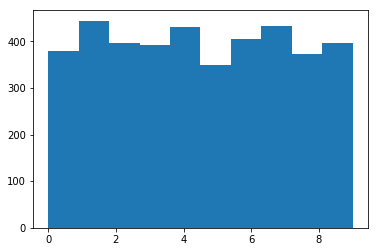

In [0]:
plt.hist(np.argmax(valid_validation_data_label,axis = 1))

In [0]:
train_data.shape

(55000, 784)

## Hyperparameter tuning

In [0]:

## Building the graph
# saver = tf.train.Saver()
# hid_neuron = [90]
num_steps = 30000
batch_size = 4112
train_losses = []
test_acc = []
plot_every = 50
number_of_epoch = 450
# learning_rate = 0.001
lr = tf.placeholder(tf.float32, shape = [])
number_of_ex = train_data.shape[0]

total_steps_for_one_pass = number_of_ex//batch_size + 1


X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
weights = {
    'h1': tf.Variable(np.float32(clf.coefs_[0])),
    'out': tf.Variable(np.float32(clf.coefs_[1]))
}
biases = {
    'b1': tf.Variable(np.float32(clf.intercepts_ [0])),
    'out': tf.Variable(np.float32(clf.intercepts_ [1]))
}
saver = tf.train.Saver()
W_track = []
ValidAccuracy_Track = []
ValidAccuracy_Test_track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.matmul(layer_1, G_W2) + G_b2
    layer_2 = tf.nn.relu(layer_2)
    out_layer = tf.matmul(layer_2, G_W3) + G_b3
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, G_w_out_h1), G_b_out_h1)
        layer1_feedback1 = tf.nn.tanh(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer_2, G_w_h2_h1), G_b_h2_h1)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)

        layer_1 = layer_1 + layer1_feedback1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1f), G_b1f)
        layer_1 = tf.nn.relu(layer_1)
        layer_2 = tf.matmul(layer_1, G_W2) + G_b2
        layer_2 = tf.nn.relu(layer_2)
        out_layer = tf.matmul(layer_2, G_W3) + G_b3 #+ tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))

        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]
    
for wL1 in range(1,6):
  for WL2 in range(1,wL1+1):
    for WL3 in range(0,2):

        wLoss1 = wL1
        wLoss2 = WL2
        wLoss3 = WL3
        loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
        loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
        loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

        loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)

        train_op = optimizer.minimize(loss)
        correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

        ### Initialization and running the model
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            best_accuracy_valid = 0
            for ep in range(0,number_of_epoch):
              if ep<10:
                learn = .001
              elif ep >=50 and ep <= 500:
                learn = .001
              else:
                learn = .001
#               learn = .01/(10+ep)
              for step in range(0, total_steps_for_one_pass):

                if step>=number_of_ex//batch_size:
                  batch_x, batch_y = train_data[step*batch_size:,:],train_label_one_hot[step*batch_size:,:]
#                   print(step,'Finishing',step*batch_size )
                  step = 0

                else:

                  start = step*batch_size
                  finish = (step+1)*batch_size
#                   print(step,'Doing', 'Start = ', start, "Finish = ", finish)
                  batch_x, batch_y = train_data[step:finish,:],train_label_one_hot[step:finish,:]
        #         batch_x, batch_y = next_batch(batch_size, combined_train_valid, combined_train_valid_label)
                sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, lr: learn})              



  #                 batch_x, batch_y = next_batch(batch_size, train_data, train_label_one_hot)
  #                 sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
              if ep % plot_every == 0:
                  train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
                  print("epoch " + str(ep) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
                  train_losses.append(train_loss)
                  validation_accuracy = sess.run(accuracy*100, feed_dict={X: valid_validation_data,Y:valid_validation_data_label})
                  if ep%plot_every == 0:
                    print("Validation Accuracy valid {} ...".format(validation_accuracy))
                    print()
                    if (validation_accuracy >= best_accuracy_valid):
                      best_accuracy_valid = validation_accuracy
                      saver.save(sess, './statimgTrack')
                      G_W1np, G_b1np, G_W2np, G_b2np = sess.run([G_W1, G_b1, G_W2, G_b2])
            print("Valid acc=",str(best_accuracy_valid), "%")
            ValidAccuracy_Track.append(best_accuracy_valid)
            this_params = G_W1np, G_b1np, G_W2np, G_b2np
            W_track.append(this_params)
            # code for checking accuracy of valid_test
            validation_test_accuracy = sess.run(accuracy*100, feed_dict={X: valid_test_data,Y:valid_test_data_label})
            ValidAccuracy_Test_track.append(validation_test_accuracy)
            print("Validation Accuracy Test {} ...".format(validation_test_accuracy))
            print("="*50)
            print("W1 = {} ...".format(wLoss1))
            print("W2 = {} ...".format(wLoss2))
            print("W3 = {} ...".format(wLoss3))

            print("*"*50)
            print("="*50)


epoch 0, training loss= 0.7109242, training acc= 100.0%
Validation Accuracy valid 98.625 ...

epoch 50, training loss= 0.05016519, training acc= 100.0%
Validation Accuracy valid 98.5250015258789 ...

epoch 100, training loss= 0.027451145, training acc= 100.0%
Validation Accuracy valid 98.5250015258789 ...

epoch 150, training loss= 0.018565519, training acc= 100.0%
Validation Accuracy valid 98.5250015258789 ...

epoch 200, training loss= 0.013296039, training acc= 100.0%
Validation Accuracy valid 98.54999542236328 ...

epoch 250, training loss= 0.009975923, training acc= 100.0%
Validation Accuracy valid 98.54999542236328 ...

epoch 300, training loss= 0.007783676, training acc= 100.0%
Validation Accuracy valid 98.57500457763672 ...

epoch 350, training loss= 0.006240866, training acc= 100.0%
Validation Accuracy valid 98.57500457763672 ...

epoch 400, training loss= 0.005150044, training acc= 100.0%
Validation Accuracy valid 98.54999542236328 ...

Valid acc= 98.625 %
Validation Accuracy

In [0]:
import matplotlib.pyplot as plt
plt.plot(ValidAccuracy_Track)
plt.plot(ValidAccuracy_Test_track)

plt.ylabel('Iter')
plt.grid(abs)
plt.show()

In [0]:
print(np.max(ValidAccuracy_Track))
print(np.argmax(ValidAccuracy_Track))

### Best wt 411

# Copy correct NN model below

#### weights are 1,1,1

In [0]:
shuffling_indices_validation_data = np.random.permutation(validation_data.shape[0])

In [0]:
shuffling_indices_validation_data.shape

(5000,)

In [0]:
shuffled_validation_data = validation_data[shuffling_indices_validation_data,:]
shuffled_validation_label = validation_label_one_hot[shuffling_indices_validation_data,:]
train_valid_combined_shuffled = np.concatenate((train_data, shuffled_validation_data))
train_valid_combined_shuffled_label = np.concatenate((train_label_one_hot, shuffled_validation_label))


In [0]:
validation_data.shape

(5000, 784)

(array([479., 563., 488., 493., 535., 434., 501., 550., 462., 495.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

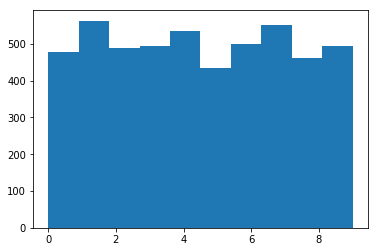

In [0]:
plt.hist(np.argmax(validation_label_one_hot,axis = 1))

In [0]:
# # keep aside 
# aside_examples= 300
# aside_valid_test = train_valid_combined_shuffled[-aside_examples:]
# aside_valid_test_label = train_valid_combined_shuffled_label[-aside_examples:]
# combined_train_valid = train_valid_combined_shuffled[:train_valid_combined.shape[0]-aside_examples,:]
# combined_train_valid_label = train_valid_combined_shuffled_label[:train_valid_combined.shape[0]-aside_examples,:]

In [0]:
train_valid_combined_shuffled.shape

(60000, 784)

In [0]:
# # keep aside 
# aside_examples= 400
# aside_valid_test = train_valid_combined_shuffled[-aside_examples:]
# aside_valid_test_label = train_valid_combined_shuffled_label[-aside_examples:]
# combined_train_valid = train_valid_combined_shuffled[:train_valid_combined.shape[0]-aside_examples,:]
# combined_train_valid_label = train_valid_combined_shuffled_label[:train_valid_combined.shape[0]-aside_examples,:]

In [0]:
# keep aside 
aside_examples= 5000
aside_valid_test = train_valid_combined_shuffled[-aside_examples:]
aside_valid_test_label = train_valid_combined_shuffled_label[-aside_examples:]
combined_train_valid = train_valid_combined_shuffled[:train_valid_combined.shape[0]-aside_examples,:]
combined_train_valid_label = train_valid_combined_shuffled_label[:train_valid_combined.shape[0]-aside_examples,:]

In [0]:
combined_train_valid.shape

(55000, 784)

(array([479., 563., 488., 493., 535., 434., 501., 550., 462., 495.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

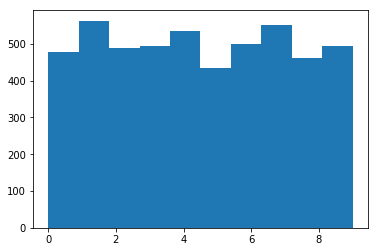

In [0]:
plt.hist(np.argmax(aside_valid_test_label,axis = 1))

## Determine how many epochs are required

In [0]:
## 123 Building the graph - Best!
saver = tf.train.Saver()
number_of_ex = combined_train_valid.shape[0]
hid_neuron = [104]
num_steps = 20000
# num_steps = 20000
number_of_epoch = 1000
batch_size = 4112
# batch_size = train_data.shape[0]

train_losses = []
test_acc = []
train_accuracy = []
val_accuracy = []
plot_every = 50
best_accuracy_valid = 0
learning_rate = 0.001
track_step = []
tracked_valid_accuracy = []
total_steps_for_one_pass = number_of_ex//batch_size + 1
step = 0
X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
lr = tf.placeholder(tf.float32, shape = [])
W_track = []
ValidAccuracy_Track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.matmul(layer_1, G_W2) + G_b2
    layer_2 = tf.nn.relu(layer_2)
    out_layer = tf.matmul(layer_2, G_W3) + G_b3
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, G_w_out_h1), G_b_out_h1)
        layer1_feedback1 = tf.nn.tanh(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer_2, G_w_h2_h1), G_b_h2_h1)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)

        layer_1 = layer_1 + layer1_feedback1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1f), G_b1f)
        layer_1 = tf.nn.relu(layer_1)
        layer_2 = tf.matmul(layer_1, G_W2) + G_b2
        layer_2 = tf.nn.relu(layer_2)
        out_layer = tf.matmul(layer_2, G_W3) + G_b3 #+ tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))

        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]


wLoss1 = 4
wLoss2 = 1
wLoss3 = 1
loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)


optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    for ep in range(0,number_of_epoch):
      if ep<100:
        learn = .1
      elif ep >=100 and ep <= 400:
        learn = .1
      else:
        learn = .01
      for step in range(0, total_steps_for_one_pass):
#         print(step)
#         if (step>5000):
#           plot_every = 10
        
        if step>=number_of_ex//batch_size:
          batch_x, batch_y = combined_train_valid[step*batch_size:,:],combined_train_valid_label[step*batch_size:,:]
#           print(step,'Finishing',step*batch_size )
          step = 0
          
        else:
          
          start = step*batch_size
          finish = (step+1)*batch_size
#           print(step,'Doing', 'Start = ', start, "Finish = ", finish)
          batch_x, batch_y = combined_train_valid[step:finish,:],combined_train_valid_label[step:finish,:]
#         batch_x, batch_y = next_batch(batch_size, combined_train_valid, combined_train_valid_label)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, lr: learn})
      if ep % plot_every == 0:
          train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
#             train_accuracy.append(train_acc)
#             print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
          track_step.append(step)
          train_loss_total, train_acc_total = sess.run([loss, accuracy], feed_dict={X: combined_train_valid,Y: combined_train_valid_label})
          train_accuracy.append(train_acc_total)
          train_losses.append(train_loss_total)
          print("epoch " + str(ep) + ", training loss Total= " + str(train_loss_total) +", training acc total= "+str(train_acc_total*100)+"%")
          validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
          print("ValidTest acc=",str(validationTest_accuracy), "%")
          tracked_valid_accuracy.append(validationTest_accuracy)
          if ep%plot_every == 0:
            if (validationTest_accuracy >= best_accuracy_valid):
              best_accuracy_valid = validationTest_accuracy
              saver.save(sess, './statlog_letterReducedSGD')
              G_W1np, G_b1np, G_W2np, G_b2np = sess.run([G_W1, G_b1, G_W2, G_b2])
  #         if(train_loss_total<0.033881765):
  #           break
                                         
    validationValid_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
    print("ValidValid acc=",str(validationValid_accuracy), "%")
    
    validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
    print("ValidTest acc=",str(validationTest_accuracy), "%")
    this_params = G_W1np, G_b1np, G_W2np, G_b2np
    W_track.append(this_params)
#     saver.save(sess, './statlog_letterAdam')
    print("="*50)
    print("W1")
    print(wLoss1)

    print("W2")
    print(wLoss2)
    print("*"*50)
    
    print("="*50)

epoch 0, training loss Total= 0.0928024, training acc total= 99.3254542350769%
ValidTest acc= 97.74 %
epoch 50, training loss Total= 0.0042735366, training acc total= 99.99818205833435%
ValidTest acc= 98.34 %
epoch 100, training loss Total= 0.002150851, training acc total= 99.99818205833435%
ValidTest acc= 98.46 %
epoch 150, training loss Total= 0.0014125848, training acc total= 100.0%
ValidTest acc= 98.46 %
epoch 200, training loss Total= 0.0010120461, training acc total= 100.0%
ValidTest acc= 98.479996 %
epoch 250, training loss Total= 0.0007988668, training acc total= 100.0%
ValidTest acc= 98.52 %
epoch 300, training loss Total= 0.0006712744, training acc total= 100.0%
ValidTest acc= 98.52 %
epoch 350, training loss Total= 0.0005836758, training acc total= 100.0%
ValidTest acc= 98.5 %
epoch 400, training loss Total= 0.0005187863, training acc total= 100.0%
ValidTest acc= 98.52 %
epoch 450, training loss Total= 0.0005132301, training acc total= 100.0%
ValidTest acc= 98.52 %
epoch 500

# Delete later - continus trainig from above - restore

In [0]:
## 123 Building the graph - Best!
saver = tf.train.Saver()
number_of_ex = combined_train_valid.shape[0]
hid_neuron = [104]
num_steps = 20000
# num_steps = 20000
number_of_epoch = 1000
batch_size = 4112
# batch_size = train_data.shape[0]

train_losses = []
test_acc = []
train_accuracy = []
val_accuracy = []
plot_every = 50
best_accuracy_valid = 0
learning_rate = 0.001
track_step = []
tracked_valid_accuracy = []
total_steps_for_one_pass = number_of_ex//batch_size + 1
step = 0
X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
lr = tf.placeholder(tf.float32, shape = [])
W_track = []
ValidAccuracy_Track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.matmul(layer_1, G_W2) + G_b2
    layer_2 = tf.nn.relu(layer_2)
    out_layer = tf.matmul(layer_2, G_W3) + G_b3
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, G_w_out_h1), G_b_out_h1)
        layer1_feedback1 = tf.nn.tanh(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer_2, G_w_h2_h1), G_b_h2_h1)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)

        layer_1 = layer_1 + layer1_feedback1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1f), G_b1f)
        layer_1 = tf.nn.relu(layer_1)
        layer_2 = tf.matmul(layer_1, G_W2) + G_b2
        layer_2 = tf.nn.relu(layer_2)
        out_layer = tf.matmul(layer_2, G_W3) + G_b3 #+ tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))

        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]


wLoss1 = 4
wLoss2 = 1
wLoss3 = 1
loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)


optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Initialization and running the model
with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
    saver.restore(sess, './statlog_letterReducedSGD')
    best_accuracy_valid = 0
    for ep in range(0,number_of_epoch):
      if ep<100:
        learn = .1
      elif ep >=100 and ep <= 400:
        learn = .1
      else:
        learn = .001
      for step in range(0, total_steps_for_one_pass):
#         print(step)
#         if (step>5000):
#           plot_every = 10
        
        if step>=number_of_ex//batch_size:
          batch_x, batch_y = combined_train_valid[step*batch_size:,:],combined_train_valid_label[step*batch_size:,:]
#           print(step,'Finishing',step*batch_size )
          step = 0
          
        else:
          
          start = step*batch_size
          finish = (step+1)*batch_size
#           print(step,'Doing', 'Start = ', start, "Finish = ", finish)
          batch_x, batch_y = combined_train_valid[step:finish,:],combined_train_valid_label[step:finish,:]
#         batch_x, batch_y = next_batch(batch_size, combined_train_valid, combined_train_valid_label)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, lr: learn})
      if ep % plot_every == 0:
          train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
#             train_accuracy.append(train_acc)
#             print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
          track_step.append(step)
          train_loss_total, train_acc_total = sess.run([loss, accuracy], feed_dict={X: combined_train_valid,Y: combined_train_valid_label})
          train_accuracy.append(train_acc_total)
          train_losses.append(train_loss_total)
          print("epoch " + str(ep) + ", training loss Total= " + str(train_loss_total) +", training acc total= "+str(train_acc_total*100)+"%")
          validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
          print("ValidTest acc=",str(validationTest_accuracy), "%")
          tracked_valid_accuracy.append(validationTest_accuracy)
          if ep%plot_every == 0:
            if (validationTest_accuracy >= best_accuracy_valid):
              best_accuracy_valid = validationTest_accuracy
              saver.save(sess, './statlog_letterReducedSGDv2')
              G_W1np, G_b1np, G_W2np, G_b2np = sess.run([G_W1, G_b1, G_W2, G_b2])
  #         if(train_loss_total<0.033881765):
  #           break
                                         
    validationValid_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
    print("ValidValid acc=",str(validationValid_accuracy), "%")
    
    validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
    print("ValidTest acc=",str(validationTest_accuracy), "%")
    this_params = G_W1np, G_b1np, G_W2np, G_b2np
    W_track.append(this_params)
#     saver.save(sess, './statlog_letterAdam')
    print("="*50)
    print("W1")
    print(wLoss1)

    print("W2")
    print(wLoss2)
    print("*"*50)
    
    print("="*50)

INFO:tensorflow:Restoring parameters from ./statlog_letterReducedSGD
epoch 0, training loss Total= 0.00046452947, training acc total= 100.0%
ValidTest acc= 98.56 %
epoch 50, training loss Total= 0.00042625214, training acc total= 100.0%
ValidTest acc= 98.56 %
epoch 100, training loss Total= 0.00039450754, training acc total= 100.0%
ValidTest acc= 98.56 %
epoch 150, training loss Total= 0.0003684589, training acc total= 100.0%
ValidTest acc= 98.56 %
epoch 200, training loss Total= 0.00034644315, training acc total= 100.0%
ValidTest acc= 98.56 %
epoch 250, training loss Total= 0.00032750235, training acc total= 100.0%
ValidTest acc= 98.6 %
epoch 300, training loss Total= 0.0003111477, training acc total= 100.0%
ValidTest acc= 98.6 %
epoch 350, training loss Total= 0.0002968709, training acc total= 100.0%
ValidTest acc= 98.6 %
epoch 400, training loss Total= 0.00028424725, training acc total= 100.0%
ValidTest acc= 98.6 %
epoch 450, training loss Total= 0.00028417452, training acc total= 1

# Continue training further

In [0]:
## 123 Building the graph - Best!
saver = tf.train.Saver()
number_of_ex = combined_train_valid.shape[0]
hid_neuron = [104]
num_steps = 20000
# num_steps = 20000
number_of_epoch = 1000
batch_size = 4112
# batch_size = train_data.shape[0]

train_losses = []
test_acc = []
train_accuracy = []
val_accuracy = []
plot_every = 50
best_accuracy_valid = 0
learning_rate = 0.001
track_step = []
tracked_valid_accuracy = []
total_steps_for_one_pass = number_of_ex//batch_size + 1
step = 0
X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
lr = tf.placeholder(tf.float32, shape = [])
W_track = []
ValidAccuracy_Track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.matmul(layer_1, G_W2) + G_b2
    layer_2 = tf.nn.relu(layer_2)
    out_layer = tf.matmul(layer_2, G_W3) + G_b3
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, G_w_out_h1), G_b_out_h1)
        layer1_feedback1 = tf.nn.tanh(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer_2, G_w_h2_h1), G_b_h2_h1)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)

        layer_1 = layer_1 + layer1_feedback1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1f), G_b1f)
        layer_1 = tf.nn.relu(layer_1)
        layer_2 = tf.matmul(layer_1, G_W2) + G_b2
        layer_2 = tf.nn.relu(layer_2)
        out_layer = tf.matmul(layer_2, G_W3) + G_b3 #+ tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))

        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]


wLoss1 = 4
wLoss2 = 1
wLoss3 = 1
loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)


optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Initialization and running the model
with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
    saver.restore(sess, './statlog_letterReducedSGDv2')
    best_accuracy_valid = 0
    for ep in range(0,number_of_epoch):
      if ep<100:
        learn = .1
      elif ep >=100 and ep <= 800:
        learn = .1
      else:
        learn = .01
      for step in range(0, total_steps_for_one_pass):
#         print(step)
#         if (step>5000):
#           plot_every = 10
        
        if step>=number_of_ex//batch_size:
          batch_x, batch_y = combined_train_valid[step*batch_size:,:],combined_train_valid_label[step*batch_size:,:]
#           print(step,'Finishing',step*batch_size )
          step = 0
          
        else:
          
          start = step*batch_size
          finish = (step+1)*batch_size
#           print(step,'Doing', 'Start = ', start, "Finish = ", finish)
          batch_x, batch_y = combined_train_valid[step:finish,:],combined_train_valid_label[step:finish,:]
#         batch_x, batch_y = next_batch(batch_size, combined_train_valid, combined_train_valid_label)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, lr: learn})
      if ep % plot_every == 0:
          train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
#             train_accuracy.append(train_acc)
#             print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
          track_step.append(step)
          train_loss_total, train_acc_total = sess.run([loss, accuracy], feed_dict={X: combined_train_valid,Y: combined_train_valid_label})
          train_accuracy.append(train_acc_total)
          train_losses.append(train_loss_total)
          print("epoch " + str(ep) + ", training loss Total= " + str(train_loss_total) +", training acc total= "+str(train_acc_total*100)+"%")
          validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
          print("ValidTest acc=",str(validationTest_accuracy), "%")
          tracked_valid_accuracy.append(validationTest_accuracy)
          if ep%plot_every == 0:
            if (validationTest_accuracy >= best_accuracy_valid):
              best_accuracy_valid = validationTest_accuracy
              saver.save(sess, './statlog_letterReducedSGDv3')
              G_W1np, G_b1np, G_W2np, G_b2np = sess.run([G_W1, G_b1, G_W2, G_b2])
  #         if(train_loss_total<0.033881765):
  #           break
                                         
    validationValid_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
    print("ValidValid acc=",str(validationValid_accuracy), "%")
    
    validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
    print("ValidTest acc=",str(validationTest_accuracy), "%")
    this_params = G_W1np, G_b1np, G_W2np, G_b2np
    W_track.append(this_params)
#     saver.save(sess, './statlog_letterAdam')
    print("="*50)
    print("W1")
    print(wLoss1)

    print("W2")
    print(wLoss2)
    print("*"*50)
    
    print("="*50)

INFO:tensorflow:Restoring parameters from ./statlog_letterReducedSGDv2
epoch 0, training loss Total= 0.0002832128, training acc total= 100.0%
ValidTest acc= 98.6 %
epoch 50, training loss Total= 0.0002720635, training acc total= 100.0%
ValidTest acc= 98.619995 %
epoch 100, training loss Total= 0.00026196075, training acc total= 100.0%
ValidTest acc= 98.619995 %
epoch 150, training loss Total= 0.00025272742, training acc total= 100.0%
ValidTest acc= 98.619995 %
epoch 200, training loss Total= 0.00024428585, training acc total= 100.0%
ValidTest acc= 98.64 %
epoch 250, training loss Total= 0.00023655684, training acc total= 100.0%
ValidTest acc= 98.64 %
epoch 300, training loss Total= 0.00022942362, training acc total= 100.0%
ValidTest acc= 98.64 %
epoch 350, training loss Total= 0.00022283859, training acc total= 100.0%
ValidTest acc= 98.64 %
epoch 400, training loss Total= 0.00021672503, training acc total= 100.0%
ValidTest acc= 98.64 %
epoch 450, training loss Total= 0.0002110172, trai

## Continue further training

In [0]:
## 123 Building the graph - Best!
saver = tf.train.Saver()
number_of_ex = combined_train_valid.shape[0]
hid_neuron = [104]
num_steps = 20000
# num_steps = 20000
number_of_epoch = 1000
batch_size = 4112
# batch_size = train_data.shape[0]

train_losses = []
test_acc = []
train_accuracy = []
val_accuracy = []
plot_every = 50
best_accuracy_valid = 0
learning_rate = 0.001
track_step = []
tracked_valid_accuracy = []
total_steps_for_one_pass = number_of_ex//batch_size + 1
step = 0
X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
lr = tf.placeholder(tf.float32, shape = [])
W_track = []
ValidAccuracy_Track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.matmul(layer_1, G_W2) + G_b2
    layer_2 = tf.nn.relu(layer_2)
    out_layer = tf.matmul(layer_2, G_W3) + G_b3
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, G_w_out_h1), G_b_out_h1)
        layer1_feedback1 = tf.nn.tanh(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer_2, G_w_h2_h1), G_b_h2_h1)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)

        layer_1 = layer_1 + layer1_feedback1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1f), G_b1f)
        layer_1 = tf.nn.relu(layer_1)
        layer_2 = tf.matmul(layer_1, G_W2) + G_b2
        layer_2 = tf.nn.relu(layer_2)
        out_layer = tf.matmul(layer_2, G_W3) + G_b3 #+ tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))

        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]


wLoss1 = 4
wLoss2 = 1
wLoss3 = 1
loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)


optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Initialization and running the model
with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
    saver.restore(sess, './statlog_letterReducedSGDv3')
    best_accuracy_valid = 0
    for ep in range(0,number_of_epoch):
      if ep<100:
        learn = .3
      elif ep >=100 and ep <= 800:
        learn = .2
      else:
        learn = .1
      for step in range(0, total_steps_for_one_pass):
#         print(step)
#         if (step>5000):
#           plot_every = 10
        
        if step>=number_of_ex//batch_size:
          batch_x, batch_y = combined_train_valid[step*batch_size:,:],combined_train_valid_label[step*batch_size:,:]
#           print(step,'Finishing',step*batch_size )
          step = 0
          
        else:
          
          start = step*batch_size
          finish = (step+1)*batch_size
#           print(step,'Doing', 'Start = ', start, "Finish = ", finish)
          batch_x, batch_y = combined_train_valid[step:finish,:],combined_train_valid_label[step:finish,:]
#         batch_x, batch_y = next_batch(batch_size, combined_train_valid, combined_train_valid_label)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, lr: learn})
      if ep % plot_every == 0:
          train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
#             train_accuracy.append(train_acc)
#             print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
          track_step.append(step)
          train_loss_total, train_acc_total = sess.run([loss, accuracy], feed_dict={X: combined_train_valid,Y: combined_train_valid_label})
          train_accuracy.append(train_acc_total)
          train_losses.append(train_loss_total)
          print("epoch " + str(ep) + ", training loss Total= " + str(train_loss_total) +", training acc total= "+str(train_acc_total*100)+"%")
          validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
          print("ValidTest acc=",str(validationTest_accuracy), "%")
          tracked_valid_accuracy.append(validationTest_accuracy)
          if ep%plot_every == 0:
            if (validationTest_accuracy >= best_accuracy_valid):
              best_accuracy_valid = validationTest_accuracy
              saver.save(sess, './statlog_letterReducedSGDv4')
              G_W1np, G_b1np, G_W2np, G_b2np = sess.run([G_W1, G_b1, G_W2, G_b2])
  #         if(train_loss_total<0.033881765):
  #           break
                                         
    validationValid_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
    print("ValidValid acc=",str(validationValid_accuracy), "%")
    
    validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
    print("ValidTest acc=",str(validationTest_accuracy), "%")
    this_params = G_W1np, G_b1np, G_W2np, G_b2np
    W_track.append(this_params)
#     saver.save(sess, './statlog_letterAdam')
    print("="*50)
    print("W1")
    print(wLoss1)

    print("W2")
    print(wLoss2)
    print("*"*50)
    
    print("="*50)

INFO:tensorflow:Restoring parameters from ./statlog_letterReducedSGDv3
epoch 0, training loss Total= 0.00017771152, training acc total= 100.0%
ValidTest acc= 98.64 %
epoch 50, training loss Total= 0.00016759773, training acc total= 100.0%
ValidTest acc= 98.64 %
epoch 100, training loss Total= 0.0001589612, training acc total= 100.0%
ValidTest acc= 98.659996 %
epoch 150, training loss Total= 0.00015384436, training acc total= 100.0%
ValidTest acc= 98.659996 %
epoch 200, training loss Total= 0.0001491598, training acc total= 100.0%
ValidTest acc= 98.68 %
epoch 250, training loss Total= 0.00014485916, training acc total= 100.0%
ValidTest acc= 98.68 %
epoch 300, training loss Total= 0.00014088204, training acc total= 100.0%
ValidTest acc= 98.659996 %


KeyboardInterrupt: ignored

In [0]:
# ## 123 Building the graph - Best!
# saver = tf.train.Saver()
# number_of_ex = combined_train_valid.shape[0]
# hid_neuron = [104]
# num_steps = 20000
# # num_steps = 20000
# number_of_epoch = 500000
# batch_size = 2056
# # batch_size = train_data.shape[0]

# train_losses = []
# test_acc = []
# train_accuracy = []
# val_accuracy = []
# plot_every = 10000
# best_accuracy_valid = 0
# learning_rate = 0.001
# track_step = []
# tracked_valid_accuracy = []
# total_steps_for_one_pass = number_of_ex//batch_size + 1
# step = 0
# X = tf.placeholder("float", [None, train_data.shape[1]])
# Y = tf.placeholder("float", [None, 1+np.max(train_label)])
# lr = tf.placeholder(tf.float32, shape = [])
# W_track = []
# ValidAccuracy_Track = []
# def neural_net(x,train = True):
#     layer_outputs = []
#     layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
#     layer_1 = tf.nn.relu(layer_1)
#     out_layer = tf.matmul(layer_1, G_W2) + G_b2
#     layer_outputs.append(out_layer)
#     for loop in range(0,2):        
#         layer1_feedback1 = tf.add(tf.matmul(out_layer, G_w_out_h1), G_b_out_h1)
#         layer1_feedback1 = tf.nn.relu(layer1_feedback1)
#         layer1_feedback2 = tf.add(tf.matmul(layer_2, G_w_h2_h1), G_b_h2_h1)
#         layer1_feedback2 = tf.nn.tanh(layer1_feedback2)

#         layer_1 = layer_1 + layer1_feedback1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1f), G_b1f)
#         layer_1 = tf.nn.relu(layer_1)
#         layer_2 = tf.matmul(layer_1, G_W2) + G_b2
#         layer_2 = tf.nn.relu(layer_2)
#         out_layer = tf.matmul(layer_2, G_W3) + G_b3 #+ tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))

#         layer_outputs.append(out_layer)
#     if train == True:
#         return layer_outputs
#     else:
#         return layer_outputs[0]



# wLoss1 = 6
# wLoss2 = 6
# wLoss3 = 1
# loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
# loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
# loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

# loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)


# optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)

# train_op = optimizer.minimize(loss)
# correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
# accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# ### Initialization and running the model
# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
#     best_accuracy_valid = 0
#     for ep in range(0,number_of_epoch):
#       if ep<5000:
#         learn = .1
#       elif ep >=5000 and ep <= 8000:
#         learn = .1
#       elif ep >=8000 and ep <= 30000:
#         learn = .1
#       else:
#         learn = .1
#       for step in range(0, total_steps_for_one_pass):
# #         print(step)
# #         if (step>5000):
# #           plot_every = 10
        
#         if step>=number_of_ex//batch_size:
#           batch_x, batch_y = combined_train_valid[step*batch_size:,:],combined_train_valid_label[step*batch_size:,:]
# #           print(step,'Finishing',step*batch_size )
#           step = 0
          
#         else:
          
#           start = step*batch_size
#           finish = (step+1)*batch_size
# #           print(step,'Doing', 'Start = ', start, "Finish = ", finish)
#           batch_x, batch_y = combined_train_valid[step:finish,:],combined_train_valid_label[step:finish,:]
# #         batch_x, batch_y = next_batch(batch_size, combined_train_valid, combined_train_valid_label)
#         sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, lr: learn})
#       if ep % plot_every == 0:
#           train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
# #             train_accuracy.append(train_acc)
# #             print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
#           track_step.append(step)
#           train_loss_total, train_acc_total = sess.run([loss, accuracy], feed_dict={X: combined_train_valid,Y: combined_train_valid_label})
#           train_accuracy.append(train_acc_total)
#           train_losses.append(train_loss_total)
#           print("epoch " + str(ep) + ", training loss Total= " + str(train_loss_total) +", training acc total= "+str(train_acc_total*100)+"%")
#           validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
#           print("ValidTest acc=",str(validationTest_accuracy), "%")
#           tracked_valid_accuracy.append(validationTest_accuracy)
#           if ep%plot_every == 0:
#             if (validationTest_accuracy >= best_accuracy_valid):
#               best_accuracy_valid = validationTest_accuracy
#               saver.save(sess, './statlog_letterReducedSGD')
#               G_W1np, G_b1np, G_W2np, G_b2np = sess.run([G_W1, G_b1, G_W2, G_b2])
#   #         if(train_loss_total<0.033881765):
#   #           break
                                         
#     validationValid_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
#     print("ValidValid acc=",str(validationValid_accuracy), "%")
    
#     validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
#     print("ValidTest acc=",str(validationTest_accuracy), "%")
#     this_params = G_W1np, G_b1np, G_W2np, G_b2np
#     W_track.append(this_params)
# #     saver.save(sess, './statlog_letterAdam')
#     print("="*50)
#     print("W1")
#     print(wLoss1)

#     print("W2")
#     print(wLoss2)
#     print("*"*50)
    
#     print("="*50)

epoch 0, training loss Total= 1.3372589, training acc total= 11.152416467666626%
ValidTest acc= 9.0 %
epoch 10000, training loss Total= 0.088571586, training acc total= 93.28376650810242%
ValidTest acc= 92.0 %
epoch 20000, training loss Total= 0.0610336, training acc total= 95.36555409431458%
ValidTest acc= 92.25 %
epoch 30000, training loss Total= 0.04483484, training acc total= 96.67905569076538%
ValidTest acc= 92.25 %
epoch 40000, training loss Total= 0.033418465, training acc total= 97.89343476295471%
ValidTest acc= 92.25 %
epoch 50000, training loss Total= 0.025500294, training acc total= 98.76084327697754%
ValidTest acc= 92.5 %
epoch 60000, training loss Total= 0.019763455, training acc total= 99.25650358200073%
ValidTest acc= 92.75 %
epoch 70000, training loss Total= 0.01554927, training acc total= 99.52911734580994%
ValidTest acc= 92.5 %
epoch 80000, training loss Total= 0.012403308, training acc total= 99.7273862361908%
ValidTest acc= 92.25 %
epoch 90000, training loss Total= 

KeyboardInterrupt: ignored

#### fine tune for higher precision for no. epochs

In [0]:
## 123 Building the graph - Best!
saver = tf.train.Saver()
number_of_ex = combined_train_valid.shape[0]
hid_neuron = [104]
num_steps = 20000
# num_steps = 20000
number_of_epoch = 100000
batch_size = 2056
# batch_size = train_data.shape[0]

train_losses = []
test_acc = []
train_accuracy = []
val_accuracy = []
plot_every = 10000
best_accuracy_valid = 0
learning_rate = 0.001
track_step = []
tracked_valid_accuracy = []
total_steps_for_one_pass = number_of_ex//batch_size + 1
step = 0
X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
lr = tf.placeholder(tf.float32, shape = [])
W_track = []
ValidAccuracy_Track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    out_layer = tf.matmul(layer_1, G_W2) + G_b2
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, G_w_out_h1), G_b_out_h1)
        layer1_feedback1 = tf.nn.relu(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer_2, G_w_h2_h1), G_b_h2_h1)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)

        layer_1 = layer_1 + layer1_feedback1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1f), G_b1f)
        layer_1 = tf.nn.relu(layer_1)
        layer_2 = tf.matmul(layer_1, G_W2) + G_b2
        layer_2 = tf.nn.relu(layer_2)
        out_layer = tf.matmul(layer_2, G_W3) + G_b3 #+ tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))

        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]



wLoss1 = 6
wLoss2 = 6
wLoss3 = 1
loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)


optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    for ep in range(0,number_of_epoch):
      if ep<5000:
        learn = .1
      elif ep >=5000 and ep <= 8000:
        learn = .1
      elif ep >=8000 and ep <= 30000:
        learn = .1
      else:
        learn = .1
      if ep>90000:
        plot_every = 1000
      for step in range(0, total_steps_for_one_pass):
#         print(step)
#         if (step>5000):
#           plot_every = 10
        
        if step>=number_of_ex//batch_size:
          batch_x, batch_y = combined_train_valid[step*batch_size:,:],combined_train_valid_label[step*batch_size:,:]
#           print(step,'Finishing',step*batch_size )
          step = 0
          
        else:
          
          start = step*batch_size
          finish = (step+1)*batch_size
#           print(step,'Doing', 'Start = ', start, "Finish = ", finish)
          batch_x, batch_y = combined_train_valid[step:finish,:],combined_train_valid_label[step:finish,:]
#         batch_x, batch_y = next_batch(batch_size, combined_train_valid, combined_train_valid_label)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, lr: learn})
      if ep % plot_every == 0:
          train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
#             train_accuracy.append(train_acc)
#             print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
          track_step.append(step)
          train_loss_total, train_acc_total = sess.run([loss, accuracy], feed_dict={X: combined_train_valid,Y: combined_train_valid_label})
          train_accuracy.append(train_acc_total)
          train_losses.append(train_loss_total)
          print("epoch " + str(ep) + ", training loss Total= " + str(train_loss_total) +", training acc total= "+str(train_acc_total*100)+"%")
          validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
          print("ValidTest acc=",str(validationTest_accuracy), "%")
          tracked_valid_accuracy.append(validationTest_accuracy)
          if ep%plot_every == 0:
            if (validationTest_accuracy >= best_accuracy_valid):
              best_accuracy_valid = validationTest_accuracy
              saver.save(sess, './statlog_letterReducedSGD')
              G_W1np, G_b1np, G_W2np, G_b2np = sess.run([G_W1, G_b1, G_W2, G_b2])
  #         if(train_loss_total<0.033881765):
  #           break
                                         
    validationValid_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
    print("ValidValid acc=",str(validationValid_accuracy), "%")
    
    validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
    print("ValidTest acc=",str(validationTest_accuracy), "%")
    this_params = G_W1np, G_b1np, G_W2np, G_b2np
    W_track.append(this_params)
#     saver.save(sess, './statlog_letterAdam')
    print("="*50)
    print("W1")
    print(wLoss1)

    print("W2")
    print(wLoss2)
    print("*"*50)
    
    print("="*50)

epoch 0, training loss Total= 1.3372589, training acc total= 11.152416467666626%
ValidTest acc= 9.0 %
epoch 10000, training loss Total= 0.088571586, training acc total= 93.28376650810242%
ValidTest acc= 92.0 %
epoch 20000, training loss Total= 0.0610336, training acc total= 95.36555409431458%
ValidTest acc= 92.25 %
epoch 30000, training loss Total= 0.04483484, training acc total= 96.67905569076538%
ValidTest acc= 92.25 %
epoch 40000, training loss Total= 0.033418465, training acc total= 97.89343476295471%
ValidTest acc= 92.25 %
epoch 50000, training loss Total= 0.025500294, training acc total= 98.76084327697754%
ValidTest acc= 92.5 %
epoch 60000, training loss Total= 0.019763455, training acc total= 99.25650358200073%
ValidTest acc= 92.75 %
epoch 70000, training loss Total= 0.01554927, training acc total= 99.52911734580994%
ValidTest acc= 92.5 %
epoch 80000, training loss Total= 0.012403308, training acc total= 99.7273862361908%
ValidTest acc= 92.25 %
epoch 90000, training loss Total= 

#### Train entire data till 10000 epochs

In [0]:
# keep aside 
aside_examples= 1
aside_valid_test = train_valid_combined_shuffled[-aside_examples:]
aside_valid_test_label = train_valid_combined_shuffled_label[-aside_examples:]
combined_train_valid = train_valid_combined_shuffled[:train_valid_combined.shape[0]-aside_examples,:]
combined_train_valid_label = train_valid_combined_shuffled_label[:train_valid_combined.shape[0]-aside_examples,:]

In [0]:
# train_valid_combined_shuffled.shape

In [0]:
number_of_ex

4035

In [0]:
## 123 Building the graph - Best!
saver = tf.train.Saver()
number_of_ex = combined_train_valid.shape[0]
hid_neuron = [104]
num_steps = 20000
# num_steps = 20000
number_of_epoch = 95000
batch_size = 2056
# batch_size = train_data.shape[0]

train_losses = []
test_acc = []
train_accuracy = []
val_accuracy = []
plot_every = 10000
best_accuracy_valid = 0
learning_rate = 0.001
track_step = []
tracked_valid_accuracy = []
total_steps_for_one_pass = number_of_ex//batch_size + 1
step = 0
X = tf.placeholder("float", [None, train_data.shape[1]])
Y = tf.placeholder("float", [None, 1+np.max(train_label)])
lr = tf.placeholder(tf.float32, shape = [])
W_track = []
ValidAccuracy_Track = []
def neural_net(x,train = True):
    layer_outputs = []
    layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
    layer_1 = tf.nn.relu(layer_1)
    out_layer = tf.matmul(layer_1, G_W2) + G_b2
    layer_outputs.append(out_layer)
    for loop in range(0,2):        
        layer1_feedback1 = tf.add(tf.matmul(out_layer, G_w_out_h1), G_b_out_h1)
        layer1_feedback1 = tf.nn.relu(layer1_feedback1)
        layer1_feedback2 = tf.add(tf.matmul(layer_2, G_w_h2_h1), G_b_h2_h1)
        layer1_feedback2 = tf.nn.tanh(layer1_feedback2)

        layer_1 = layer_1 + layer1_feedback1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1f), G_b1f)
        layer_1 = tf.nn.relu(layer_1)
        layer_2 = tf.matmul(layer_1, G_W2) + G_b2
        layer_2 = tf.nn.relu(layer_2)
        out_layer = tf.matmul(layer_2, G_W3) + G_b3 #+ tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))

        layer_outputs.append(out_layer)
    if train == True:
        return layer_outputs
    else:
        return layer_outputs[0]



wLoss1 = 6
wLoss2 = 6
wLoss3 = 1
loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)


optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)

train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    best_accuracy_valid = 0
    for ep in range(0,number_of_epoch):
      if ep<5000:
        learn = .1
      elif ep >=5000 and ep <= 8000:
        learn = .1
      elif ep >=8000 and ep <= 30000:
        learn = .1
      else:
        learn = .1
      if ep>90000:
        plot_every = 1000
      for step in range(0, total_steps_for_one_pass):
#         print(step)
#         if (step>5000):
#           plot_every = 10
        
        if step>=number_of_ex//batch_size:
          batch_x, batch_y = combined_train_valid[step*batch_size:,:],combined_train_valid_label[step*batch_size:,:]
#           print(step,'Finishing',step*batch_size )
          step = 0
          
        else:
          
          start = step*batch_size
          finish = (step+1)*batch_size
#           print(step,'Doing', 'Start = ', start, "Finish = ", finish)
          batch_x, batch_y = combined_train_valid[step:finish,:],combined_train_valid_label[step:finish,:]
#         batch_x, batch_y = next_batch(batch_size, combined_train_valid, combined_train_valid_label)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, lr: learn})
      if ep % plot_every == 0:
          train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
#             train_accuracy.append(train_acc)
#             print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
          track_step.append(step)
          train_loss_total, train_acc_total = sess.run([loss, accuracy], feed_dict={X: combined_train_valid,Y: combined_train_valid_label})
          train_accuracy.append(train_acc_total)
          train_losses.append(train_loss_total)
          print("epoch " + str(ep) + ", training loss Total= " + str(train_loss_total) +", training acc total= "+str(train_acc_total*100)+"%")
          validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
          print("ValidTest acc=",str(validationTest_accuracy), "%")
          tracked_valid_accuracy.append(validationTest_accuracy)
#           if ep%plot_every == 0:
#             if (validationTest_accuracy >= best_accuracy_valid):
#               best_accuracy_valid = validationTest_accuracy
#               saver.save(sess, './statlog_letterReducedSGD')
#               G_W1np, G_b1np, G_W2np, G_b2np = sess.run([G_W1, G_b1, G_W2, G_b2])
  #         if(train_loss_total<0.033881765):
  #           break
                                         
    train_loss_total, train_acc_total = sess.run([loss, accuracy], feed_dict={X: combined_train_valid,Y: combined_train_valid_label})
    print("Train acc=",str(train_acc_total), "%")
    this_params = G_W1np, G_b1np, G_W2np, G_b2np
    W_track.append(this_params)
    saver.save(sess, './statlog_satimFullSGDFinal')
    print("="*50)
    print("W1")
    print(wLoss1)

    print("W2")
    print(wLoss2)
    print("*"*50)
    
    print("="*50)

epoch 0, training loss Total= 1.1931542, training acc total= 18.155165016651154%
ValidTest acc= 0.0 %
epoch 10000, training loss Total= 0.08674385, training acc total= 93.121337890625%
ValidTest acc= 100.0 %
epoch 20000, training loss Total= 0.058712892, training acc total= 95.42174339294434%
ValidTest acc= 100.0 %
epoch 30000, training loss Total= 0.042636193, training acc total= 97.00044989585876%
ValidTest acc= 100.0 %
epoch 40000, training loss Total= 0.032625627, training acc total= 97.94767498970032%
ValidTest acc= 100.0 %
epoch 50000, training loss Total= 0.025930004, training acc total= 98.46639633178711%
ValidTest acc= 100.0 %
epoch 60000, training loss Total= 0.020940715, training acc total= 98.73703122138977%
ValidTest acc= 100.0 %
epoch 70000, training loss Total= 0.017129704, training acc total= 99.00766611099243%
ValidTest acc= 100.0 %
epoch 80000, training loss Total= 0.0141686825, training acc total= 99.32340979576111%
ValidTest acc= 100.0 %
epoch 90000, training loss T

In [0]:
# ## 123 Building the graph - Best!
# saver = tf.train.Saver()
# number_of_ex = combined_train_valid.shape[0]
# hid_neuron = [104]a
# num_steps = 150000
# # num_steps = 20000
# number_of_epoch = 95000
# batch_size = 2056
# # batch_size = train_data.shape[0]

# train_losses = []
# test_acc = []
# train_accuracy = []
# val_accuracy = []
# plot_every = 1000
# best_accuracy_valid = 0
# # learning_rate = 0.001
# track_step = []
# tracked_valid_accuracy = []
# total_steps_for_one_pass = number_of_ex//batch_size + 1
# step = 0
# X = tf.placeholder("float", [None, train_data.shape[1]])
# Y = tf.placeholder("float", [None, 1+np.max(train_label)])
# lr = tf.placeholder(tf.float32, shape = [])
# W_track = []
# ValidAccuracy_Track = []
# def neural_net(x,train = True):
#     layer_outputs = []
#     layer_1 = tf.add(tf.matmul(x, G_W1), G_b1)
#     layer_1 = tf.nn.relu(layer_1)
#     out_layer = tf.matmul(layer_1, G_W2) + G_b2
#     layer_outputs.append(out_layer)
#     for loop in range(0,2):        
#         layer1_feedback1 = tf.add(tf.matmul(out_layer, GwLoop), G_bLoop)
#         layer1_feedback1 = tf.nn.relu(layer1_feedback1)
#         layer1_feedback2 = tf.add(tf.matmul(layer1_feedback1, GwLoop2), G_bLoop2)
#         layer1_feedback2 = tf.nn.tanh(layer1_feedback2)
#         layer_1 = layer_1 + layer1_feedback2 + tf.add(tf.matmul(x, G_W1), G_b1)
#         out_layer = (tf.matmul(layer_1, G_W2) + G_b2) + tf.nn.tanh((tf.matmul(out_layer, GLossW) + GLossb))
#         layer_outputs.append(out_layer)
#     if train == True:
#         return layer_outputs
#     else:
#         return layer_outputs[0]



# wLoss1 = 6
# wLoss2 = 6
# wLoss3 = 1
# loss1 = wLoss1*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[0], labels=Y))
# loss2 = wLoss2*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[1], labels=Y))
# loss3 = wLoss3*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X)[2], labels=Y))

# loss = (loss1+loss2+loss3)/(wLoss1+ wLoss2 + wLoss3)


# optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)

# train_op = optimizer.minimize(loss)
# correct_pred = tf.equal(tf.argmax(neural_net(X)[0], 1), tf.argmax(Y, 1))
# accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# ### Initialization and running the model
# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
#     best_accuracy_valid = 0
#     for ep in range(0,number_of_epoch):
#       if ep<5000:
#         learn = .1
#       elif ep >=5000 and ep <= 8000:
#         learn = .1
#       elif ep >=8000 and ep <= 30000:
#         learn = .1
#       else:
#         learn = .1
#       if ep>90000:
#         plot_every = 1000
#       for step in range(0, total_steps_for_one_pass):
# #         print(step)
# #         if (step>5000):
# #           plot_every = 10
        
#         if step>=number_of_ex//batch_size:
#           batch_x, batch_y = combined_train_valid[step*batch_size:,:],combined_train_valid_label[step*batch_size:,:]
# #           print(step,'Finishing',step*batch_size )
#           step = 0
          
#         else:
          
#           start = step*batch_size
#           finish = (step+1)*batch_size
# #           print(step,'Doing', 'Start = ', start, "Finish = ", finish)
#           batch_x, batch_y = combined_train_valid[step:finish,:],combined_train_valid_label[step:finish,:]
# #         batch_x, batch_y = next_batch(batch_size, combined_train_valid, combined_train_valid_label)
#         sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, lr: learn})
#       if ep % plot_every == 0:
#           train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
# #             train_accuracy.append(train_acc)
# #             print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
#           track_step.append(step)
#           train_loss_total, train_acc_total = sess.run([loss, accuracy], feed_dict={X: combined_train_valid,Y: combined_train_valid_label})
#           train_accuracy.append(train_acc_total)
#           train_losses.append(train_loss_total)
#           print("epoch " + str(ep) + ", training loss Total= " + str(train_loss_total) +", training acc total= "+str(train_acc_total*100)+"%")
#           validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
# #           print("ValidTest acc=",str(validationTest_accuracy), "%")
#           tracked_valid_accuracy.append(validationTest_accuracy)
# #           if ep%plot_every == 0:
# #             if (validationTest_accuracy >= best_accuracy_valid):
# #               best_accuracy_valid = validationTest_accuracy
# #               saver.save(sess, './statlog_letterReducedSGD')
# #               G_W1np, G_b1np, G_W2np, G_b2np = sess.run([G_W1, G_b1, G_W2, G_b2])
#   #         if(train_loss_total<0.033881765):
#   #           break
                                         
# #     validationValid_accuracy = sess.run(accuracy*100, feed_dict={X: validation_data,Y:validation_label_one_hot})
# #     print("ValidValid acc=",str(validationValid_accuracy), "%")
    
# #     validationTest_accuracy = sess.run(accuracy*100, feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
# #     print("ValidTest acc=",str(validationTest_accuracy), "%")
#     train_loss_total, train_acc_total = sess.run([loss, accuracy], feed_dict={X: combined_train_valid,Y: combined_train_valid_label})
#     print("Train acc=",str(train_acc_total), "%")
#     this_params = G_W1np, G_b1np, G_W2np, G_b2np
#     W_track.append(this_params)
#     saver.save(sess, './statlog_satimFullSGDFinal')
#     print("="*50)
#     print("W1")
#     print(wLoss1)

#     print("W2")
#     print(wLoss2)
#     print("*"*50)
    
#     print("="*50)

epoch 0, training loss Total= 1.6421824, training acc total= 89.24221992492676%
epoch 1000, training loss Total= 0.1167705, training acc total= 95.24131417274475%
epoch 2000, training loss Total= 0.10244689, training acc total= 95.82769274711609%
epoch 3000, training loss Total= 0.091625914, training acc total= 95.94045877456665%
epoch 4000, training loss Total= 0.08408962, training acc total= 96.23364806175232%
epoch 5000, training loss Total= 0.073307745, training acc total= 96.32385969161987%
epoch 6000, training loss Total= 0.066499114, training acc total= 96.52683734893799%
epoch 7000, training loss Total= 0.060303714, training acc total= 96.68470621109009%
epoch 8000, training loss Total= 0.05692737, training acc total= 96.68470621109009%
epoch 8100, training loss Total= 0.056117997, training acc total= 96.68470621109009%
epoch 8200, training loss Total= 0.055982567, training acc total= 96.66215777397156%
epoch 8300, training loss Total= 0.0558603, training acc total= 96.66215777

## Check on test set!

In [0]:
with tf.Session() as sess:
    saver.restore(sess, './statlog_letterReducedSGDv4')
    train_loss_total, train_acc_total = sess.run([loss, accuracy], feed_dict={X: aside_valid_test,Y:aside_valid_test_label})
    print("Train acc=",str(train_acc_total), "%")
    test_accuracy = sess.run(accuracy*100, feed_dict={X: test_data,Y:test_label_one_hot})
    print("Test acc=",str(test_accuracy), "%")

INFO:tensorflow:Restoring parameters from ./statlog_letterReducedSGDv4
Train acc= 0.9868 %
Test acc= 98.46 %
